## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data','realestate_sold.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Serial Number', 'List Year', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Year of Sale', 'Month of Sale',
       'Sale_Amount_Zscore'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale,Sale_Amount_Zscore
0,0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9,-0.040765
1,1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10,0.033112
2,2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3,-0.142855
3,3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4,0.356761
4,4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7,0.749010
5,5,200109,2020,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.678000,Residential,Single Family,2020,12,0.610052
6,6,2020180,2020,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.801500,Residential,Two Family,2021,3,-0.177964
7,7,2020313,2020,Berlin,216 WATCH HILL RD,412000.0,677500.0,0.608100,Residential,Single Family,2021,7,0.207249
8,8,200097,2020,Bethany,23 AMITY RD,511000.0,795000.0,0.642700,Commercial,Non Residental,2021,6,0.289921
9,9,20139,2020,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,0.511500,Residential,Single Family,2020,12,-0.033729


In [7]:
df.shape

(995367, 13)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0            0
Serial Number         0
List Year             0
Town                  0
Address               0
Assessed Value        0
Sale Amount           0
Sales Ratio           0
Property Type         0
Residential Type      0
Year of Sale          0
Month of Sale         0
Sale_Amount_Zscore    0
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(995367,)

##### Extreme values checks

C:\Users\user\AppData\Local\Temp\ipykernel_14224\536925032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales Ratio'], bins=25) # Shows extreme values
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<Axes: xlabel='Sales Ratio', ylabel='Density'>

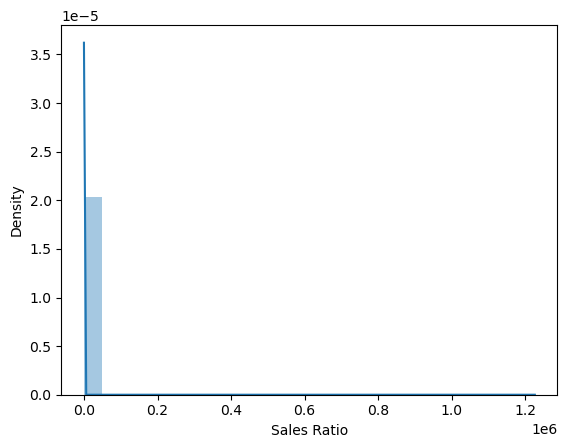

In [11]:
sns.distplot(df['Sales Ratio'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
#filtering the outliers by sales ratio that is the derivate of deviding Assessed Value by Sales Value:
df_filtered=df[(df['Sales Ratio']<2)&(df['Sales Ratio']>0)]

In [13]:
df_filtered['Sales Ratio'].mean() # Check the mean

0.6574241567695668

In [14]:
df_filtered['Sales Ratio'].median() # Check the median

0.616766667

In [15]:
df_filtered['Sales Ratio'].max() # Check the max

1.999982126

### 3. Data prep for regression analysis 

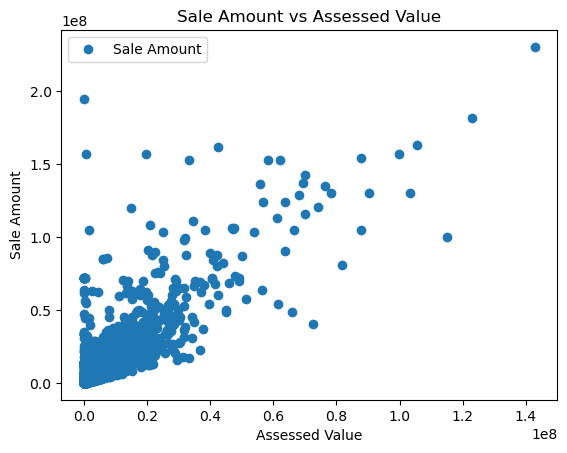

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_filtered.plot(x = 'Assessed Value', y='Sale Amount',style='o') 
# The style option creates a scatterplot; without it, we only have lines.
# 'o' for circles, 's' for squares, '^' for triangles, '+' for plus signs, '*' for stars)
# additional: '-' for solid lines, ':' for dotted lines, '--' for dashed lines, '-.' for dash-dot lines.
# example: style='s-' would produce a plot with square markers and solid lines.
plt.title('Sale Amount vs Assessed Value')  
plt.xlabel('Assessed Value')  
plt.ylabel('Sale Amount')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_filtered['Sale Amount'].values.reshape(-1,1)
y = df_filtered['Assessed Value'].values.reshape(-1,1)

In [18]:
X

array([[ 325000.],
       [ 430000.],
       [ 179900.],
       ...,
       [ 210000.],
       [ 280000.],
       [7450000.]])

In [19]:
y

array([[ 150500.],
       [ 253000.],
       [ 130400.],
       ...,
       [ 121450.],
       [ 203360.],
       [4035970.]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

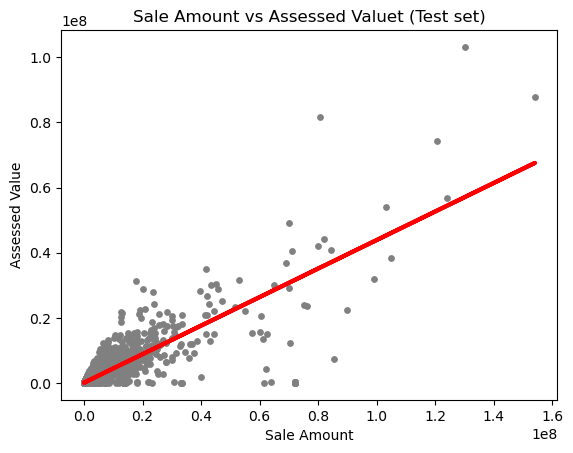

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sale Amount vs Assessed Valuet (Test set)')
plot_test.xlabel('Sale Amount')
plot_test.ylabel('Assessed Value')
plot_test.show()

In [46]:
# Correcting the path
path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Analytics'

# Save the plot with the name 'RegressiveAnalysys.png' in the 'Analytics' directory
plt.savefig(os.path.join(path, 'RegressiveAnalysys.png'))


<Figure size 640x480 with 0 Axes>

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43838847]]
Mean squared error:  149593567585.11426
R2 score:  0.6724719853295498


In [27]:
# The summary, based on these result: the model demonstrates a moderate ability to explain the variance in the dependent variable, 
# as indicated by the R2 score. 
# However, the relatively high mean squared error implies that there is a considerable level of prediction error, 
# highlighting potential limitations in the model's predictive accuracy.  

In [28]:
y_predicted

array([[173146.5997798 ],
       [ 98795.91482569],
       [620741.23031134],
       ...,
       [167009.16116331],
       [152542.34156728],
       [162625.27643724]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,101220.0,173146.599780
1,77070.0,98795.914826
2,584160.0,620741.230311
3,108070.0,106073.163471
4,435300.0,476073.034351
5,45920.0,79734.784037
6,209300.0,169201.103526
7,71130.0,96867.005546
8,112000.0,155172.672403
9,103180.0,140705.852807


##### Compare how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43838847]]
Mean squared error:  165084455242.55225
R2 score:  0.7208221625521414


In [33]:
# In summary, the model demonstrates a notable ability to explain the variance in the dependent variable,
# as indicated by the relatively high R2 score. 
# However, the substantial mean squared error implies a considerable level of prediction error, 
# which may impact the model's overall predictive accuracy.

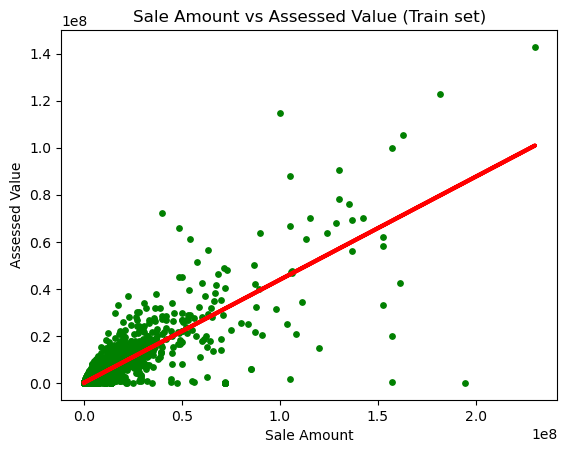

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sale Amount vs Assessed Value (Train set)')
plot_test.xlabel('Sale Amount')
plot_test.ylabel('Assessed Value')
plot_test.savefig(os.path.join(path, 'RegressiveAnalysys.png'))  # Save the plot
plot_test.show()

### Bonus: performance improvement after removing outliers

In [35]:
# Clean the extreme values from the "Assessed Value" variable observed during the consistency checks.

df_test = df_filtered[df_filtered['Year of Sale']==2020]

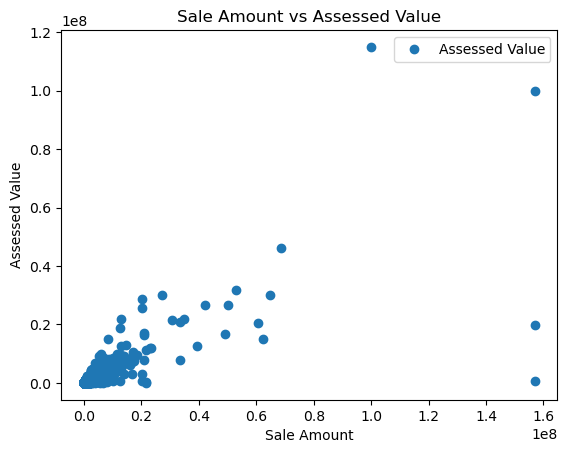

In [36]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Sale Amount', y='Assessed Value', style='o')  
plt.title('Sale Amount vs Assessed Value')  
plt.xlabel('Sale Amount')  
plt.ylabel('Assessed Value')  
plt.show()

In [37]:
# Reshape again.

X_2 = df_test['Sale Amount'].values.reshape(-1,1)
y_2 = df_test['Assessed Value'].values.reshape(-1,1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [40]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [41]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43010078]]
Mean squared error:  65574706287.116394
R2 score:  0.8005521917117651


In [43]:
#In summary, despite the removal of outliers, the relationship between the independent and dependent variables,
# as represented by the slope, remains constant. 
# The model demonstrates a consistent level of explanatory power, as evidenced by the R2 score, 
# while the mean squared error persists at a notable level, indicating ongoing prediction error.

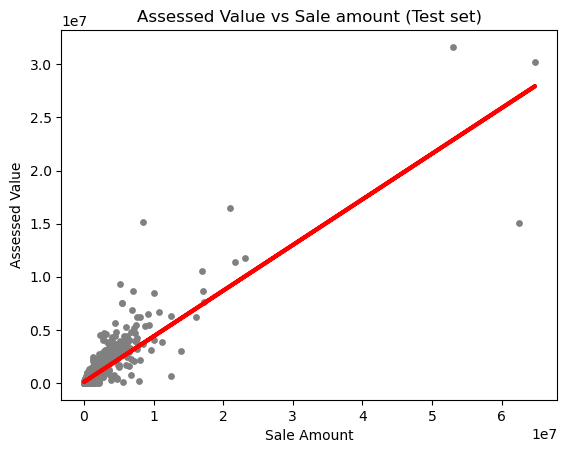

In [54]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Assessed Value vs Sale amount (Test set)')
plot_test.ylabel('Assessed Value')
plot_test.xlabel('Sale Amount')

plot_test.savefig(os.path.join(path, 'RegressiveAnalysysNoOutliers.png'))  # Save the plot

plot_test.show()

In [50]:
# Save the plot with the name 'RegressiveAnalysysNoOutliers.png' in the 'Analytics' directory
plot_test.savefig(os.path.join(path, 'RegressiveAnalysys1.png'))


<Figure size 640x480 with 0 Axes>

In [45]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,173980.0,2.119030e+05
1,245000.0,2.665258e+05
2,245870.0,2.527626e+05
3,879250.0,1.246295e+06
4,345590.0,3.667393e+05
5,328660.0,3.043747e+05
6,103380.0,1.215819e+05
7,60600.0,1.323344e+05
8,162850.0,2.033010e+05
9,77600.0,1.407213e+05
